In [47]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as nr
import numpy.linalg as nl
from scipy.stats import multivariate_normal as mvnorm
from numpy.random import normal
from scipy.stats import norm
from math import sqrt,pi
import random

nr.seed(420) #blaze it

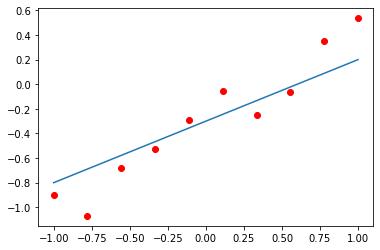

In [48]:
#Plot 10 points for dataset and target lines

def line(x,slope = 0.5,intercept = -0.3):
    return slope*x + intercept

x = np.linspace(-1,1,10)
t = line(x)  #given params are 0.5 as slope, -0.3 as intercept
y= []
for i in t:
    i = i + normal(0,0.2)     #noise has 0 mean and 0.2 variance
    y.append(i)
plt.plot(x,t)
plt.scatter(x,y,color = "red")
plt.show()


In [49]:
def likelihood(x, y, w1, w0):
    sd = 0.2
    constant = sqrt(np.pi * 2) * sd
    return (1/constant) * np.exp(-0.5 * ((y - line(x, w1, w0))/sd) ** 2)

#The following text is used as a reference for the next code cell.

<img src = "Bayes_part1.png">

In [50]:
m0,s0 = np.array([0,0]),np.array([[0.5,0],[0,0.5]]) #since mean of prior is 0 and variance of prior is 0.5 (as given)
beta = 25  #since variance of noise is 0.04, and beta is inverse of variance


def mean_and_cov(beta,phi,s0,m0,t):
    
    beta_term = beta * (phi.T * t)
    
    s_NInv = nl.inv(s0) + beta*(phi.T@phi)
    m_N = nl.inv(s_NInv)@(nl.inv(s0)@m0.reshape((2,1)) + beta_term)
    
    return m_N.reshape((1,2))[0],nl.inv(s_NInv)


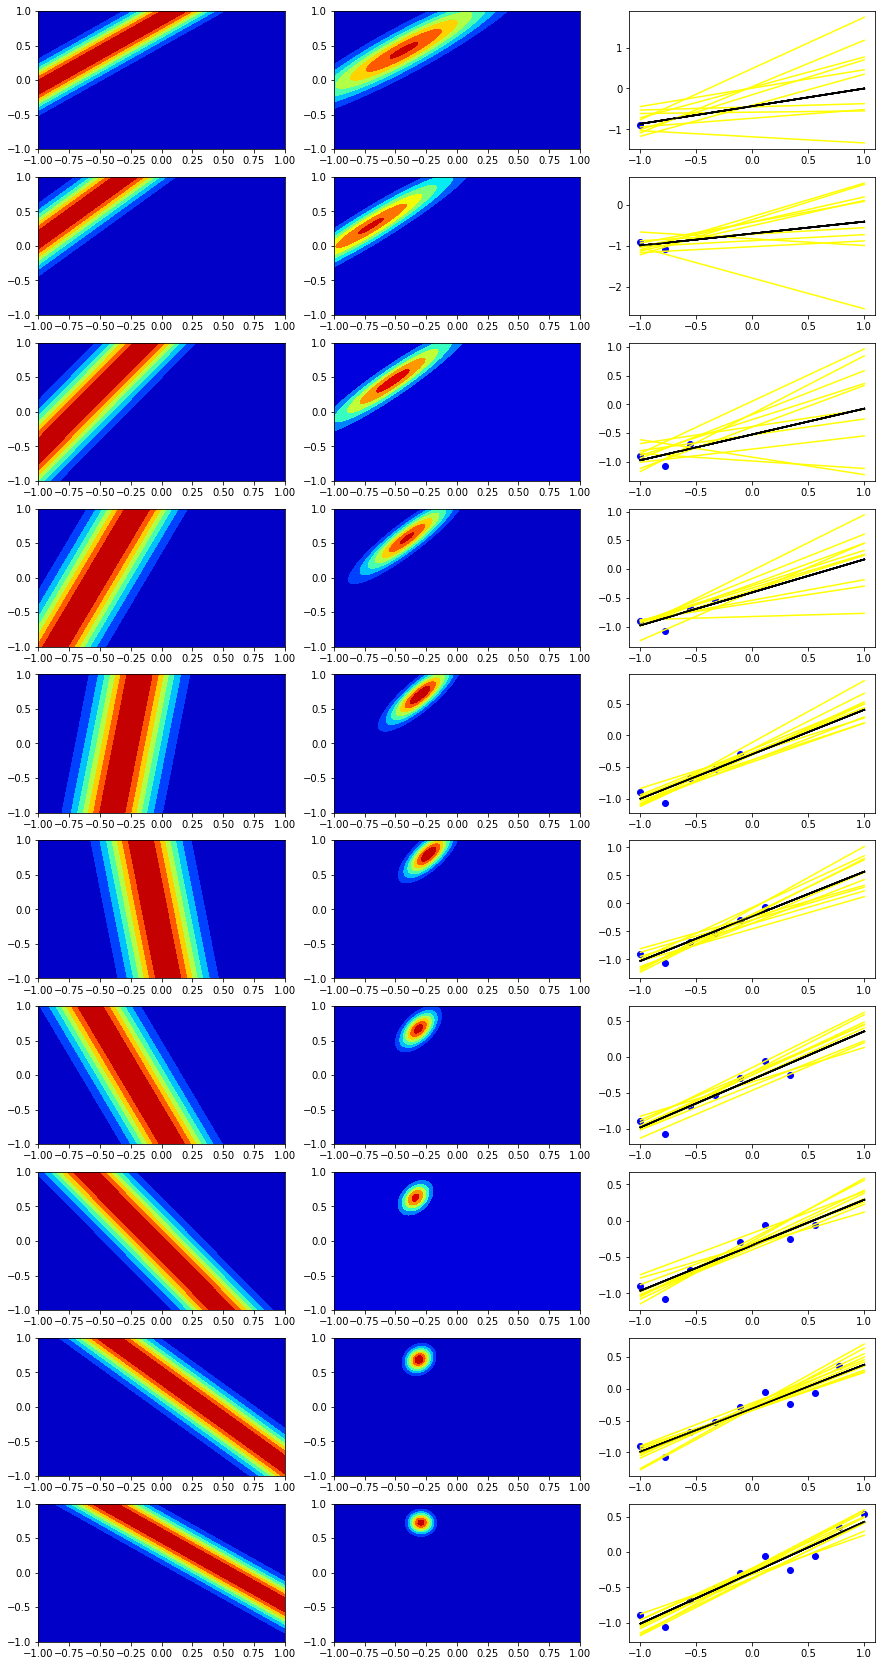

In [51]:
figure,axes = plt.subplots(len(x),3,figsize=(15,30))
count = 0

w0,w1 = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
g0,g1 = norm.pdf(w0,0,sqrt(0.5)),norm.pdf(w1,0,sqrt(0.5)) #prior has mean 0, var 0.5

prior = g0*g1
s,m = s0,m0
x1,y1 = [],[]

for i,j in zip(x,y):
    
    l_hood = likelihood(i,j,w1,w0)
    post = prior * l_hood
    prior = post
    phi = np.array([1,i]).reshape((1,2))
    m,s = mean_and_cov(beta,phi,s,m,j)
    points = mvnorm.rvs(m,s,10)
    x1.append(i)
    y1.append(j)
    
    axes[count,0].contourf(w0,w1,l_hood,cmap='jet')
    axes[count,1].contourf(w0,w1,post,cmap='jet')
    for params in points:
        axes[count,2].plot(x,params[1]*x + params[0],color='yellow')
        axes[count,2].plot(x,m[1]*x + m[0],color = 'black')
    axes[count,2].scatter(x1,y1,color='blue')
        
    count+=1
figure.savefig("Posterior and Likelihood")

In [45]:
from scipy.stats import multivariate_normal as mvnorm

mvnorm.rvs?